In [17]:
import pickle
import numpy as np
import pandas as pd
from plotting import *
import scipy as sp

def load_grid(filename):
    # grid_results: [gold_agreement, expected_agreement, sampled_agreement, no_possible_coaltions, entropy]
    E = 12
    grid_results = None
    with open('model_runs/debugging/' + filename + '.pickle', 'rb') as handle:
        grid_results = pickle.load(handle)

    avg_agreement = [None] * E
    avg_gold_regrets = [None] * E
    avg_zero_counter = [None] * E
    normalized_expected_regrets = [None] * E
    normalized_agreement = [None] * E
    avg_expected_regrets = [None] * E

    no_results = len(grid_results)
    print("Results in grid: ", no_results)
    print("Values per experiment: ",  int(no_results / E))

    for e in range(E):          
        expected_regrets = [None] * int(no_results / E)
        gold_regrets = [None] * int(no_results / E)

        for i, index in enumerate(range(e, len(grid_results), E)):
            gold_regrets[i], expected_regrets[i], _, _, _  = grid_results[index]
            
        avg_gold_regrets[e] = np.sum(gold_regrets) / len(gold_regrets)
        
        avg_expected_regrets[e] = np.sum(expected_regrets) / len(expected_regrets)

        agreement_cleaned = [val for val in expected_regrets if val > 0]        
        avg_agreement[e] = np.sum(agreement_cleaned) / len(agreement_cleaned)
        
        zero_counter = 0
        for val in expected_regrets:
            if val == 0:
                zero_counter += 1

        avg_zero_counter[e] = 1 - zero_counter / len(expected_regrets)
        
        normalized_expected_regrets[e] = avg_expected_regrets[e] / avg_gold_regrets[e]
        normalized_agreement[e] =  avg_agreement[e] / avg_gold_regrets[e]
        
    return [normalized_expected_regrets, normalized_agreement, avg_zero_counter, [n for n in range(1, E+1)]]

Results in grid:  12000
Values per experiment:  1000
[0.92426826370970017, 0.92051755048992145, 0.90586640291286369, 0.92004896659008661, 0.90586640291286369, 0.92005541127481805, 0.82633891830728323, 0.73440784701901407, 0.29300105536465326, 0.92548701207098782, 0.9185723681343162, 0.91222982204425107]


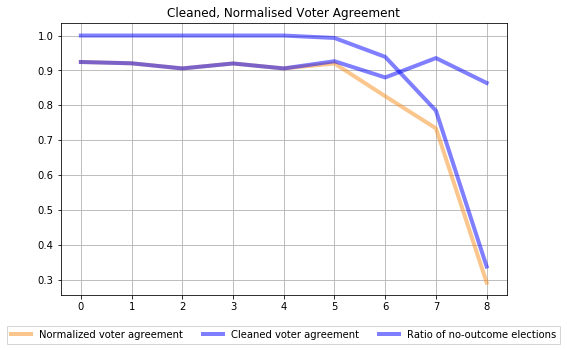

In [28]:
file = "4-5-1000-A-1000"
grid_4_5_1000_A_1000 = load_grid(file)
labels = grid_4_5_1000_A_1000[3]

print(grid_4_5_1000_A_1000[0])

from pylab import *

f, ax = plt.subplots(figsize=(8, 5))

x = labels[:9]
a = grid_4_5_1000_A_1000[0][:9]
b = grid_4_5_1000_A_1000[1][:9]
c = grid_4_5_1000_A_1000[2][:9]
#F78F1E', '#0000FF', '#078C62'

plt.plot(a, color="#F78F1E", linewidth=4, linestyle="-", alpha=0.5)
plt.plot(b, color="#0000FF", linewidth=4, linestyle="-", alpha=0.5)
plt.plot(c, color="#0000FF", linewidth=4, linestyle="-", alpha=0.5)

#ax.set_ylim(ymin=0, ymax=1)

plt.title('Cleaned, Normalised Voter Agreement')
grid(True)
plt.savefig('cleaned_line.png', dpi=200)

legend = ["Normalized voter agreement", "Cleaned voter agreement", "Ratio of no-outcome elections"]

plt.legend(legend, loc='upper center',
               bbox_to_anchor=(0.5, -0.095),
               fancybox=False, shadow=False, ncol=5)

plt.savefig('entropy_coalitions.png', dpi=200)
plt.show(f)

Results in grid:  12000
Values per experiment:  1000
[0.92426826370970017, 0.92051755048992145, 0.90586640291286369, 0.92004896659008661, 0.90586640291286369, 0.92005541127481805, 0.82633891830728323, 0.73440784701901407, 0.29300105536465326, 0.92548701207098782, 0.9185723681343162, 0.91222982204425107]


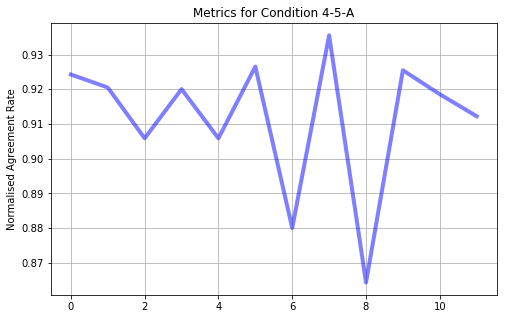

In [20]:
file = "4-5-1000-A-1000"
grid_4_5_1000_A_1000 = load_grid(file)

print(grid_4_5_1000_A_1000[0])

from pylab import *

f, ax = plt.subplots(figsize=(8, 5))

x = labels[:9]
b = grid_4_5_1000_A_1000[1]
#F78F1E', '#0000FF', '#078C62'

plt.plot(b, color="#0000FF", linewidth=4, linestyle="-", alpha=0.5)

plt.ylabel('Normalised Agreement Rate')
plt.title('Metrics for Condition 4-5-A')
grid(True)
plt.savefig('agreement_line.png', dpi=200)

#plt.legend(legend, loc='upper center',
#               bbox_to_anchor=(0.5, -0.095),
#               fancybox=False, shadow=False, ncol=5)

plt.savefig('entropy_coalitions.png', dpi=200)
plt.show(f)